### Importation des librairies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from skimpy import skim
from scipy.stats import pearsonr, chi2_contingency
from statsmodels.api import sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import smf
from statsmodels.discrete.discrete_model import BinaryResultsWrapper
from statsmodels.stats.diagnostic import het_white
import warnings

%matplotlib inline

### Importation de la base de données

In [3]:
data= pd.read_csv('../data/hmeq.csv', delimiter=',')

In [4]:
df= data.copy()

In [4]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [12]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5960   │ │ float64     │ 9     │                                                          │
│ │ Number of columns │ 13     │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA    ┃ NA %   ┃ mean    ┃ sd      ┃ p0      ┃ p25    ┃ p50    ┃ p75     ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ BAD           │     0 │      0 │  0.1995 │  0.3997 │       0 │      0 │      0 │       0 │      1 │ ▇    ▂ │  │
│ │ LOAN          │     0 │      0 │   18610 │   11210 │    1100 │  11100 │  16300 │   23300 │  89900 │  ▇▇▁   │  │
│ │ MORTDUE       │   518 │   8.69 │   73760 │   44460 │    2063 │  46280 │  65020 │   91490 │ 399600 │  ▇▆▁   │  │
│ │ VALUE         │   112 │   1.88 │  101800 │   57390 │    8000 │  66080 │  89240 │  119800 │ 855900 │   ▇▁   │  │
│ │ YOJ           │   515 │   8.64 │   8.922 │   7.574 │       0 │      3 │      7 │      13 │     41 │  ▇▅▂▁  │  │
│ │ DEROG         │   708 │  11.88 │  0.2546 │   0.846 │       0 │      0 │      0 │       0 │     10 │   ▇    │  │
│ │ DELINQ        │   580 │   9.73 │  0.4494 │   1.127 │       0 │      0 │      0 │       0 │     15 │   ▇    │  │
│ │ CLAGE         │   308 │   5.17 │   179.8 │   85.81 │       0 │  115.1 │  173.5 │   231.6 │   1168 │   ▇▅   │  │
│ │ NINQ          │   510 │   8.56 │   1.186 │   1.729 │       0 │      0 │      1 │       2 │     17 │   ▇▁   │  │
│ │ CLNO          │   222 │   3.72 │    21.3 │   10.14 │       0 │     15 │     20 │      26 │     71 │  ▂▇▅▁  │  │
│ │ DEBTINC       │  1267 │  21.26 │   33.78 │   8.602 │  0.5245 │  29.14 │  34.82 │      39 │  203.3 │   ▇▇   │  │
│ └───────────────┴───────┴────────┴─────────┴─────────┴─────────┴────────┴────────┴─────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA       ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ REASON                   │      252 │       4.23 │                         0.96 │                     5708 │  │
│ │ JOB                      │      279 │       4.68 │                         0.95 │                     5681 │  │
│ └──────────────────────────┴──────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BAD,5960.0,NaN,NaN,NaN,0.199497,0.399656,0.0,0.0,0.0,0.0,1.0
LOAN,5960.0,NaN,NaN,NaN,18607.969799,11207.480417,1100.0,11100.0,16300.0,23300.0,89900.0
MORTDUE,5442.0,NaN,NaN,NaN,73760.8172,44457.609458,2063.0,46276.0,65019.0,91488.0,399550.0
VALUE,5848.0,NaN,NaN,NaN,101776.048741,57385.775334,8000.0,66075.5,89235.5,119824.25,855909.0
REASON,5708,2,DebtCon,3928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JOB,5681,6,Other,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YOJ,5445.0,NaN,NaN,NaN,8.922268,7.573982,0.0,3.0,7.0,13.0,41.0
DEROG,5252.0,NaN,NaN,NaN,0.25457,0.846047,0.0,0.0,0.0,0.0,10.0
DELINQ,5380.0,NaN,NaN,NaN,0.449442,1.127266,0.0,0.0,0.0,0.0,15.0
CLAGE,5652.0,NaN,NaN,NaN,179.766275,85.810092,0.0,115.116702,173.466667,231.562278,1168.233561


* Visualisation des lignes où il y a plus de 5 valeurs manquantes

In [8]:
nan_count = df.isna().sum(axis=1)
plus_5_nan = df[nan_count > 5]
plus_5_nan

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1,2000,22608.0,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN
17,1,2200,23030.0,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,3.711312
51,0,3100,NaN,70400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,1,3600,61584.0,61800.0,HomeImp,ProfExe,10.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,0,24600,NaN,146804.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.263535
4789,0,25100,85337.0,104607.0,HomeImp,NaN,6.0,NaN,NaN,NaN,NaN,NaN,27.950475
4880,0,25600,NaN,147598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.461987
4899,0,25700,85417.0,98179.0,HomeImp,NaN,7.0,NaN,NaN,NaN,NaN,NaN,30.829477


In [9]:
plus_5_nan['BAD'].value_counts() # la plupart des valeurs manquantes sont associés à des bons créanciers 

BAD
0    142
1     50
Name: count, dtype: int64

### Analyse des relations des variables explicatives et la cible

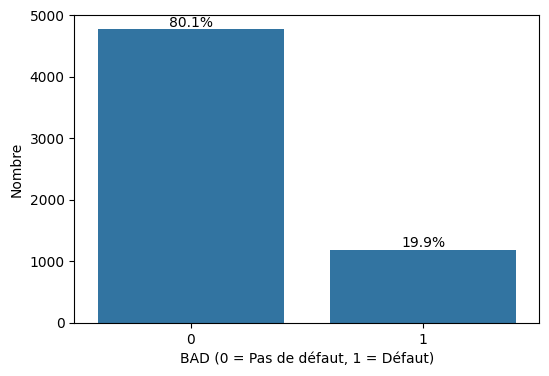

In [10]:
# Distribution de la variable cible => on a plus de bons créanciers que mauvais créanciers dans la base de données

plt.figure(figsize=(6, 4))

ax = sns.countplot(x='BAD', data=df)
total = len(df)
for p in ax.patches:
    ax.annotate(f'{100 * p.get_height() / total:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.xlabel('BAD (0 = Pas de défaut, 1 = Défaut)')
plt.ylabel('Nombre')
plt.show()

* DELINQ (Nombre de lignes de crédit en retard de paiement)

In [11]:
df['DELINQ'].value_counts()

DELINQ
0.0     4179
1.0      654
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
10.0       2
11.0       2
15.0       1
12.0       1
13.0       1
Name: count, dtype: int64

In [12]:
table_delinq = pd.crosstab(df['DELINQ'], df['BAD'])
table_delinq
# si tu as fait plus de 5 défauts alors après tu es considéré comme un vrmt dans le rouge car après BAD =1

BAD,0,1
DELINQ,,
0.0,3596,583
1.0,432,222
2.0,138,112
3.0,58,71
4.0,32,46
5.0,7,31
6.0,0,27
7.0,0,13
8.0,0,5


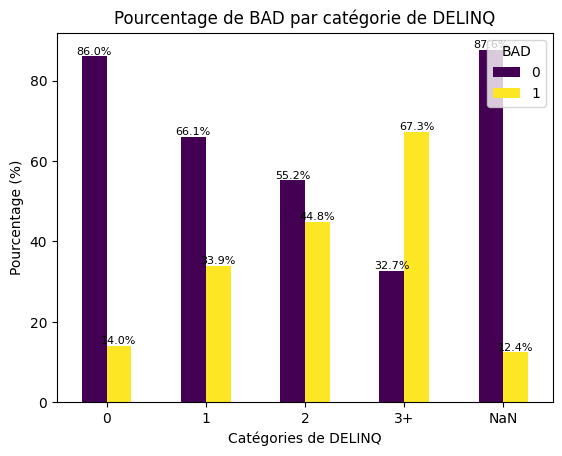

In [13]:
def categorize_delinquents(delinquance):
    if pd.isna(delinquance):  
        return 'NaN'
    if delinquance == 0:
        return '0'
    elif delinquance == 1:
        return '1'
    elif delinquance == 2:
        return '2'
    else:
        return '3+'

df['DELINQ_Category'] = df['DELINQ'].apply(categorize_delinquents)
counts = df.groupby(['DELINQ_Category', 'BAD']).size().unstack(fill_value=0)
percentage = counts.div(counts.sum(axis=1), axis=0) * 100
ax = percentage.plot(kind='bar', colormap='viridis')

plt.title('Pourcentage de BAD par catégorie de DELINQ')
plt.xlabel('Catégories de DELINQ')
plt.ylabel('Pourcentage (%)')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge',fontsize=8)

plt.xticks(rotation=0) 
plt.legend(title='BAD', loc='upper right')  
plt.show()

In [14]:
print("Table des pourcentages :")
print(percentage)

Table des pourcentages :
BAD                      0          1
DELINQ_Category                      
0                86.049294  13.950706
1                66.055046  33.944954
2                55.200000  44.800000
3+               32.659933  67.340067
NaN              87.586207  12.413793


* DEROG (Nombre de rapports de défaillances majeures)

In [15]:
table_derog = pd.crosstab(df['DEROG'], df['BAD'])
table_derog

BAD,0,1
DEROG,,
0.0,3773,754
1.0,266,169
2.0,78,82
3.0,15,43
4.0,5,18
5.0,8,7
6.0,5,10
7.0,0,8
8.0,0,6


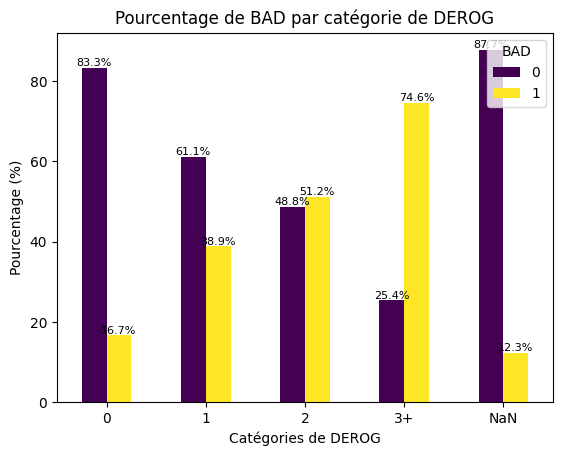

In [16]:
def categorize_derogation(derogation):
    if pd.isna(derogation): 
        return 'NaN'
    elif derogation == 0:
        return '0'
    elif derogation == 1:
        return '1'
    elif derogation == 2:
        return '2'
    else:
        return '3+'


df['DEROG_Category'] = df['DEROG'].apply(categorize_derogation)
counts = df.groupby(['DEROG_Category', 'BAD']).size().unstack(fill_value=0)
percentage = counts.div(counts.sum(axis=1), axis=0) * 100
ax = percentage.plot(kind='bar', colormap='viridis')

plt.title('Pourcentage de BAD par catégorie de DEROG')
plt.xlabel('Catégories de DEROG')
plt.ylabel('Pourcentage (%)')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge',fontsize=8)

plt.xticks(rotation=0) 
plt.legend(title='BAD', loc='upper right') 
plt.show()

In [17]:
# Les NaN
print("Table des pourcentages :")
print(percentage)

Table des pourcentages :
BAD                     0          1
DEROG_Category                      
0               83.344378  16.655622
1               61.149425  38.850575
2               48.750000  51.250000
3+              25.384615  74.615385
NaN             87.711864  12.288136


* DEBTINC (Ratio de la dette sur le revenu)

In [18]:
#66% des NaN dans la colonne DEBTINC sont des mauvais créanciers
nan_bad_debtinc = df.groupby('BAD')['DEBTINC'].apply(lambda x: x.isna().mean() * 100)
print(nan_bad_debtinc)

BAD
0    10.081744
1    66.105971
Name: DEBTINC, dtype: float64


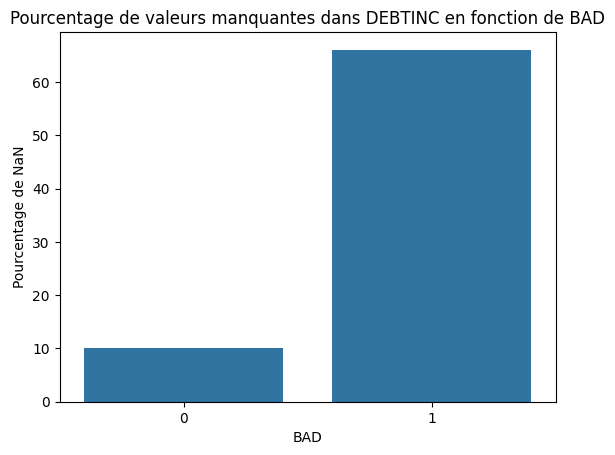

In [19]:
nan_bad_debtinc = df.groupby('BAD')['DEBTINC'].apply(lambda x: x.isna().mean() * 100).reset_index()
nan_bad_debtinc.columns = ['BAD', 'NaN_Percentage']

# Visualiser les pourcentages de NaN avec un graphique en barres
sns.barplot(x='BAD', y='NaN_Percentage', data=nan_bad_debtinc)
plt.title('Pourcentage de valeurs manquantes dans DEBTINC en fonction de BAD')
plt.ylabel('Pourcentage de NaN')
plt.xlabel('BAD')
plt.show()

* NINQ (Nombre de demandes récentes de crédit)

In [20]:
df['NINQ'].value_counts()

NINQ
0.0     2531
1.0     1339
2.0      780
3.0      392
4.0      156
5.0       75
6.0       56
7.0       44
10.0      28
8.0       22
9.0       11
11.0      10
12.0       2
13.0       2
14.0       1
17.0       1
Name: count, dtype: int64

In [21]:
#Ceux qui demandent le plus de crédit sont ceux qui ne sont pas mauvais créanciers (confiance)
table_ninq = pd.crosstab(df['NINQ'], df['BAD'])
table_ninq

BAD,0,1
NINQ,,
0.0,2135,396
1.0,1085,254
2.0,599,181
3.0,285,107
4.0,95,61
5.0,39,36
6.0,27,29
7.0,29,15
8.0,11,11


* CLAGE (Âge de la ligne de crédit la plus ancienne en mois)

In [22]:
# Variable CLAGE :  ancienneté de la 1 ère ligne de crédit
# Catégorie pour une interprétation plus simple

bins = [-1, 12, 60, 120, 240, float('inf')]  # de -1 à 12 mois, 1 à 5 ans, 5 à 10 ans, 10 à 20 ans, 20+ ans
labels = ['< 1 an', '1-5 ans', '5-10 ans', '10-20 ans', '20 ans et +']
df['CLAGE_Categories'] = pd.cut(df['CLAGE'], bins=bins, labels=labels)
nan_count = df['CLAGE_Categories'].isna().sum()
clage_counts = df['CLAGE_Categories'].value_counts(dropna=False).sort_index()
clage_counts['NaN'] = nan_count
clage_counts


CLAGE_Categories
< 1 an           22
1-5 ans         162
5-10 ans       1389
10-20 ans      2817
20 ans et +    1262
NaN             308
NaN             308
Name: count, dtype: int64

/var/folders/69/j599p47x1wb0mvnxf05tpj5m0000gn/T/ipykernel_43437/2972978044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clage_counts.index, y=clage_counts.values, palette='viridis')


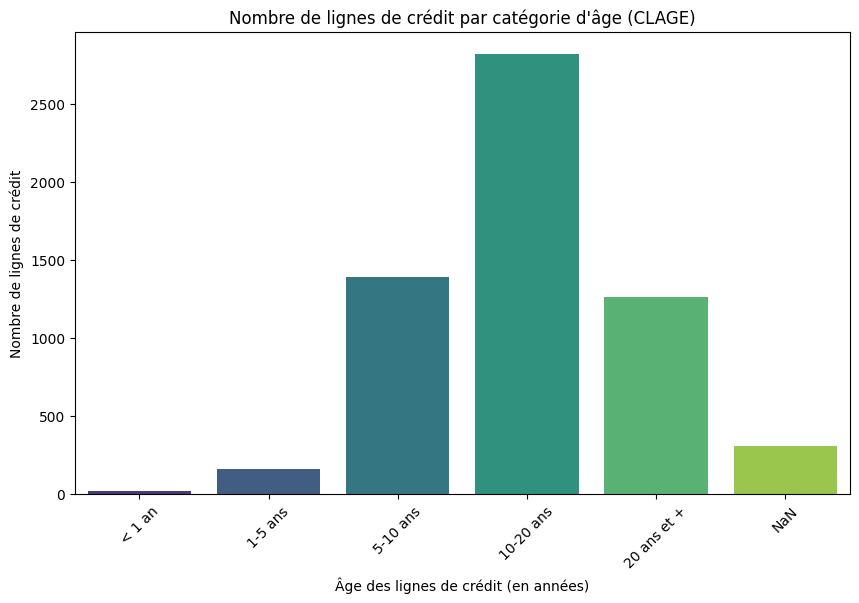

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x=clage_counts.index, y=clage_counts.values, palette='viridis')
plt.title('Nombre de lignes de crédit par catégorie d\'âge (CLAGE)')
plt.xlabel('Âge des lignes de crédit (en années)')
plt.ylabel('Nombre de lignes de crédit')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

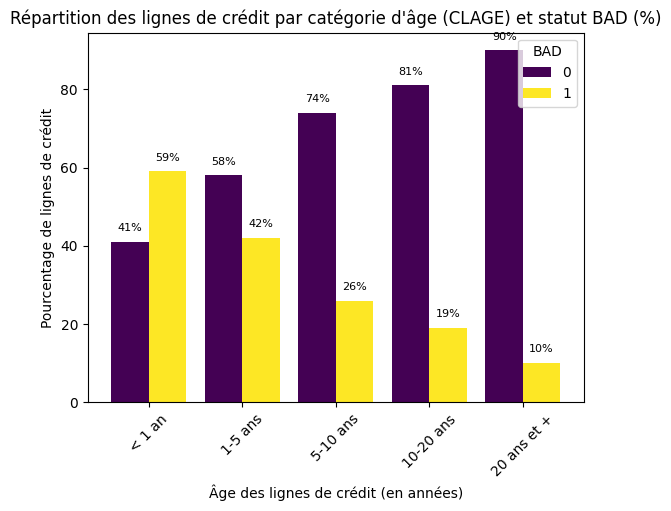

In [24]:
# Clage en fonction de BAD
clage_bad_counts = pd.crosstab(df['CLAGE_Categories'], df['BAD'], normalize='index') * 100
clage_bad_counts = clage_bad_counts.round(0) 

plt.figure(figsize=(12, 6))
ax = clage_bad_counts.plot(kind='bar', stacked=False, colormap='viridis', width=0.8)
plt.title('Répartition des lignes de crédit par catégorie d\'âge (CLAGE) et statut BAD (%)')
plt.xlabel('Âge des lignes de crédit (en années)')
plt.ylabel('Pourcentage de lignes de crédit')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points', fontsize=8)  

plt.legend(title='BAD', loc='upper right')
plt.show()



* REASON (Motif du pret) et JOB (Catégories professionnelles)

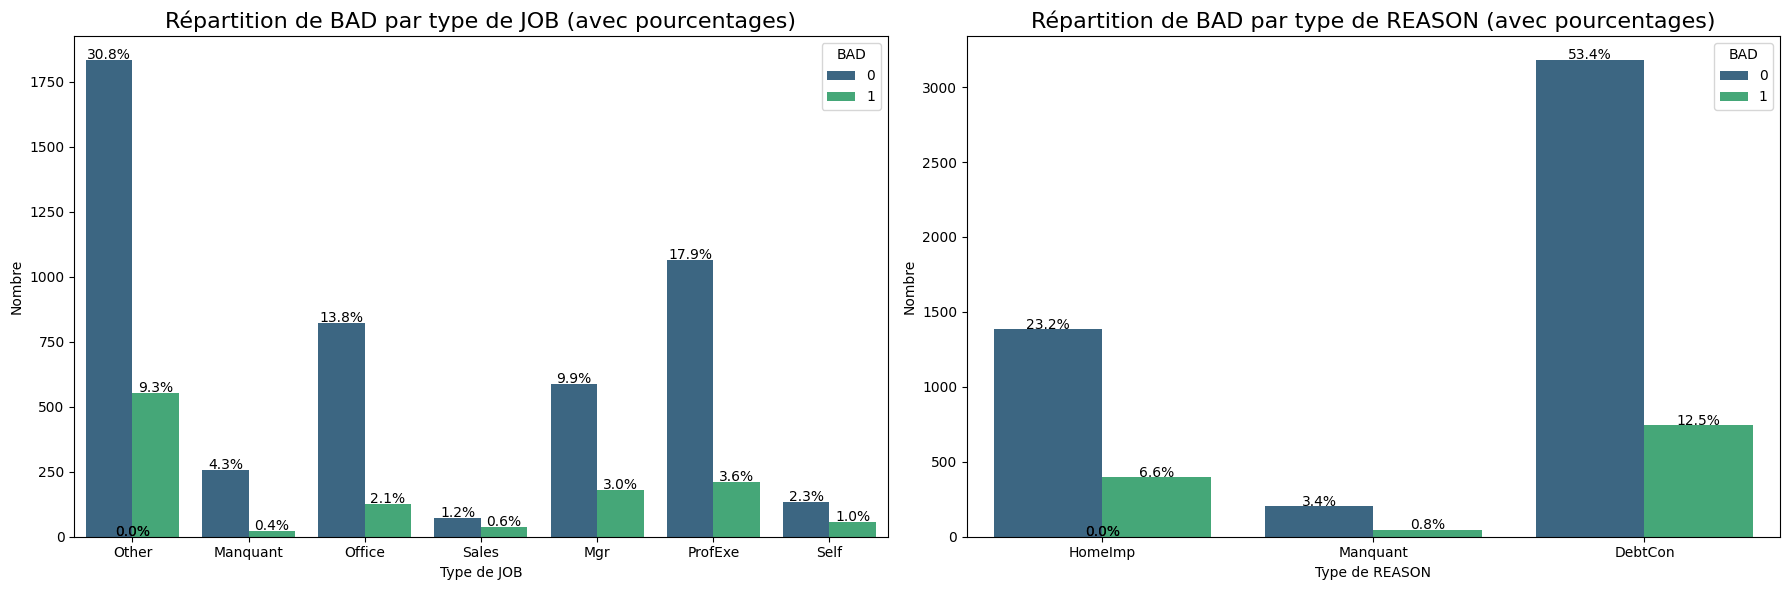

In [25]:
df['JOB'] = df['JOB'].fillna('Manquant')
df['REASON'] = df['REASON'].fillna('Manquant')

colors = sns.color_palette('viridis', n_colors=2)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
total = len(df)

# Graphique pour la variable JOB
ax1 = sns.countplot(data=df, x='JOB', hue='BAD', ax=axes[0], palette=colors)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(
        p.get_x() + p.get_width() / 2., 
        height + 3, 
        '{:1.1f}%'.format(100 * height / total), 
        ha="center"
    )
    ax1.set_title('Répartition de BAD par type de JOB (avec pourcentages)', fontsize=16)
    ax1.set_xlabel('Type de JOB', fontsize=10)
    ax1.set_ylabel('Nombre', fontsize=10)

# Graphique pour la variable REASON
ax2 = sns.countplot(data=df, x='REASON', hue='BAD', ax=axes[1], palette=colors)
for p in ax2.patches:
    height = p.get_height()
    ax2.text(
        p.get_x() + p.get_width() / 2., 
        height + 3, 
        '{:1.1f}%'.format(100 * height / total), 
        ha="center"
    )
    ax2.set_title('Répartition de BAD par type de REASON (avec pourcentages)', fontsize=16)
    ax2.set_xlabel('Type de REASON', fontsize=10)
    ax2.set_ylabel('Nombre', fontsize=10)

plt.tight_layout()
plt.show()


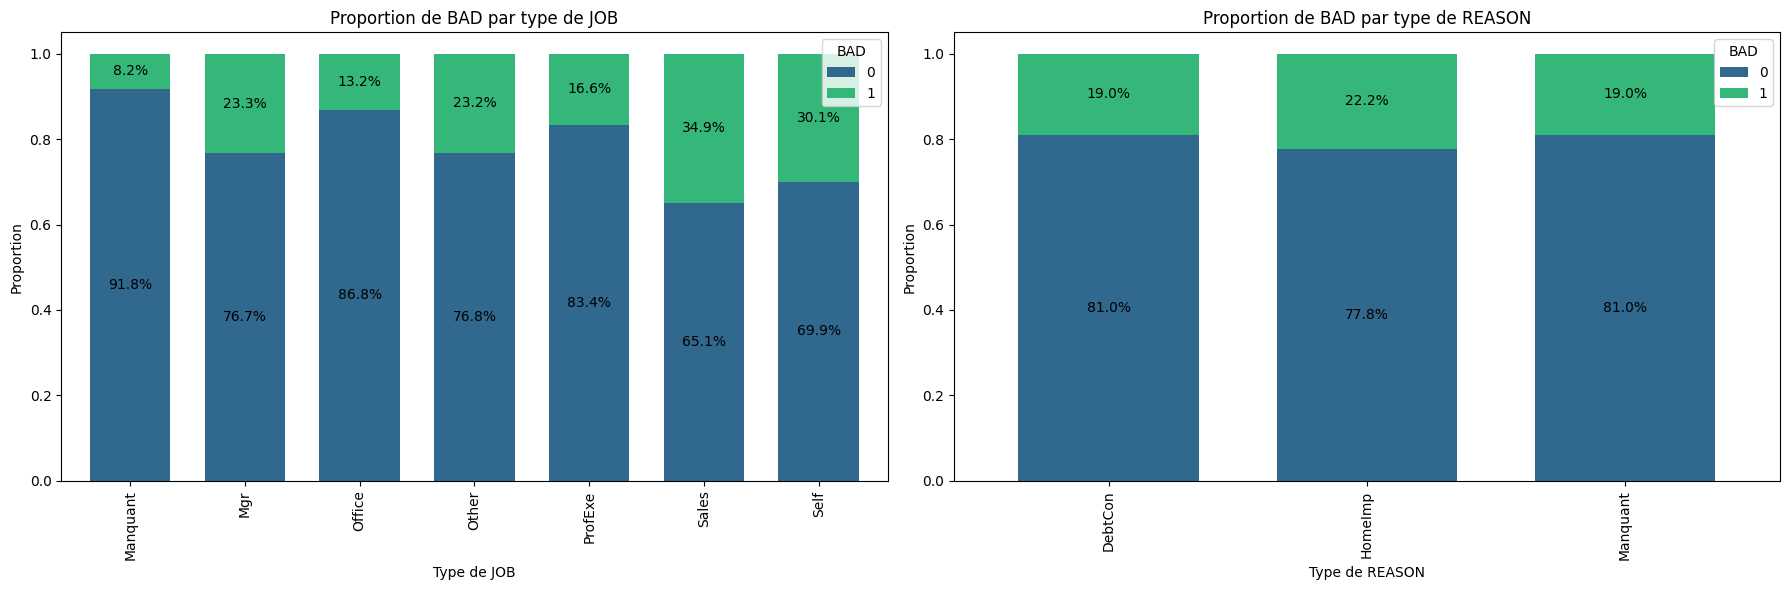

In [26]:
df['JOB'] = df['JOB'].fillna('Manquant')
df['REASON'] = df['REASON'].fillna('Manquant')

cross_tab_job = pd.crosstab(df['JOB'], df['BAD'], normalize='index')
cross_tab_reason = pd.crosstab(df['REASON'], df['BAD'], normalize='index')

colors = sns.color_palette('viridis', n_colors=2)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Graphique pour JOB
ax1 = cross_tab_job.plot(kind='bar', stacked=True, ax=axes[0], color=colors, width=0.7)
for p in ax1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax1.text(x + width / 2, y + height / 2, '{:.1%}'.format(height), ha='center', va='center')
    ax1.set_title('Proportion de BAD par type de JOB', fontsize=12)
    ax1.set_xlabel('Type de JOB', fontsize=10)
    ax1.set_ylabel('Proportion', fontsize=10)
    ax1.legend(title='BAD', loc='upper right')

# Graphique pour REASON
ax2 = cross_tab_reason.plot(kind='bar', stacked=True, ax=axes[1], color=colors, width=0.7)
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.text(x + width / 2, y + height / 2, '{:.1%}'.format(height), ha='center', va='center')
    ax2.set_title('Proportion de BAD par type de REASON', fontsize=12)
    ax2.set_xlabel('Type de REASON', fontsize=10)
    ax2.set_ylabel('Proportion', fontsize=10)
    ax2.legend(title='BAD', loc='upper right')

plt.tight_layout()
plt.show()


* YOJ (Nombre d'années dans l'emploi actuel)

In [27]:
df['YOJ'].value_counts()

YOJ
0.00     415
1.00     363
2.00     347
5.00     333
4.00     324
        ... 
29.90      1
12.90      1
13.50      1
0.25       1
8.30       1
Name: count, Length: 99, dtype: int64

In [28]:
table_yoj = pd.crosstab(df['YOJ'], df['BAD'])
table_yoj

BAD,0,1
YOJ,,
0.00,357,58
0.10,3,11
0.20,5,5
0.25,0,1
0.30,3,4
...,...,...
33.00,0,2
34.00,1,1
35.00,5,0


In [29]:
# Arrondir les valeurs de 'YOJ' à l'entier le plus proche
df['YOJ_Rounded'] = df['YOJ'].round()
table_yoj = pd.crosstab(df['YOJ_Rounded'], df['BAD'])
table_yoj


BAD,0,1
YOJ_Rounded,,
0.0,374,89
1.0,293,96
2.0,275,107
3.0,235,80
4.0,269,88
5.0,256,79
6.0,279,50
7.0,207,40
8.0,214,51


/var/folders/69/j599p47x1wb0mvnxf05tpj5m0000gn/T/ipykernel_43437/1645357327.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yoj_counts.index, y=yoj_counts.values, palette='viridis')


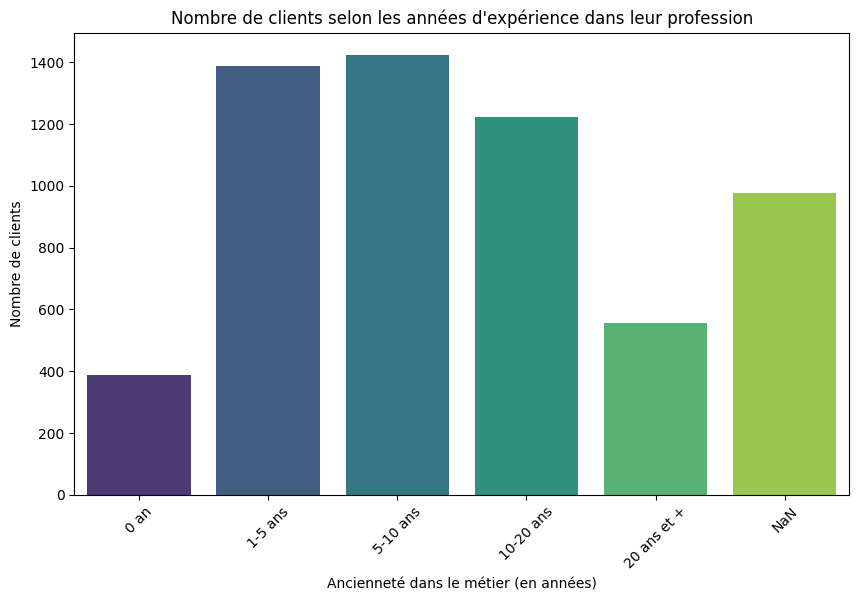

In [30]:
# Catégorie pour une interprétation plus simple

bins_yoj = [ 0, 1, 5, 10, 20, float('inf')]  
labels_yoj = ['0 an', '1-5 ans', '5-10 ans', '10-20 ans', '20 ans et +']
df['YOJ_Categories'] = pd.cut(df['YOJ_Rounded'], bins=bins_yoj, labels=labels_yoj)

yoj_counts = df['YOJ_Categories'].value_counts(dropna=False).sort_index()
nan_count_yoj = df['YOJ_Categories'].isna().sum()
yoj_counts['NaN'] = nan_count_yoj

plt.figure(figsize=(10, 6))
sns.barplot(x=yoj_counts.index, y=yoj_counts.values, palette='viridis')
plt.title('Nombre de clients selon les années d\'expérience dans leur profession')
plt.xlabel('Ancienneté dans le métier (en années)')
plt.ylabel('Nombre de clients')
plt.xticks(rotation=45)
plt.show()



<Figure size 1200x600 with 0 Axes>

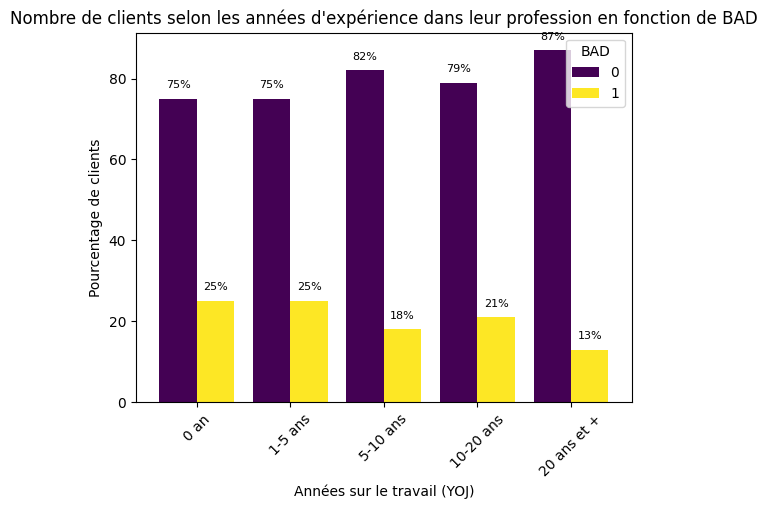

In [31]:
# YOJ en focntion de BAD
yoj_bad_counts = pd.crosstab(df['YOJ_Categories'], df['BAD'], normalize='index') * 100
yoj_bad_counts = yoj_bad_counts.round(0)

plt.figure(figsize=(12, 6))
ax = yoj_bad_counts.plot(kind='bar', stacked=False, colormap='viridis', width=0.8)
plt.title('Nombre de clients selon les années d\'expérience dans leur profession en fonction de BAD')
plt.xlabel('Années sur le travail (YOJ)')
plt.ylabel('Pourcentage de clients')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.legend(title='BAD', loc='upper right')
plt.show()


* MORTDUE (Montant dû sur l'hypothèque existante)

In [32]:
df['MORTDUE_Rounded'] = df['MORTDUE'].round()
table_mortdue = pd.crosstab(df['MORTDUE'], df['BAD'])
table_mortdue

BAD,0,1
MORTDUE,,
2063.0,0,1
2619.0,1,0
2800.0,0,1
3372.0,0,1
4000.0,0,1
...,...,...
371003.0,1,0
391000.0,0,1
397299.0,0,1


In [33]:
# Définir les intervalles (bins) 
bins = [2000, 100000, 200000, float('inf')]  
labels = ['2000-100000', '100000-200000', '200000+']  
df['MORTDUE_Category'] = pd.cut(df['MORTDUE'], bins=bins, labels=labels, right=False)  
df['MORTDUE_Category'] = df['MORTDUE_Category'].cat.add_categories('Manquant') 
df['MORTDUE_Category'] = df['MORTDUE_Category'].fillna('Manquant') 
table_mortdue = pd.crosstab(df['MORTDUE_Category'], df['BAD'])
table_mortdue

BAD,0,1
MORTDUE_Category,,
2000-100000,3483,889
100000-200000,790,172
200000+,86,22
Manquant,412,106


<Figure size 1200x600 with 0 Axes>

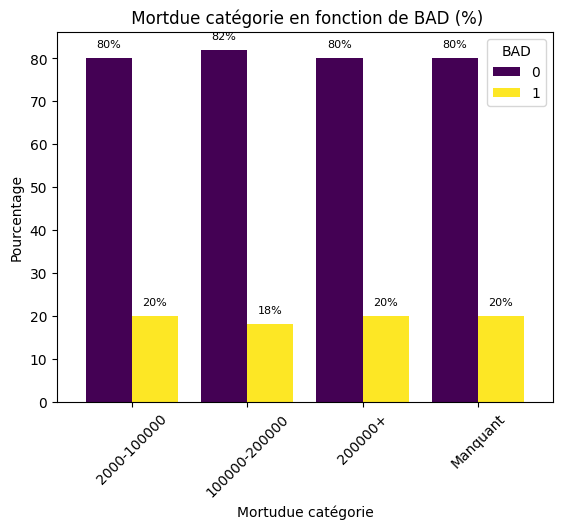

In [34]:
# Mortdue en fonction de BAD
table_mortdue = pd.crosstab(df['MORTDUE_Category'], df['BAD'], normalize='index') * 100
table_mortdue = table_mortdue.round(0) 

plt.figure(figsize=(12, 6))
ax = table_mortdue.plot(kind='bar', stacked=False, colormap='viridis', width=0.8)
plt.title(' Mortdue catégorie en fonction de BAD (%)')
plt.xlabel('Mortudue catégorie')
plt.ylabel('Pourcentage')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points', fontsize=8)  

plt.legend(title='BAD', loc='upper right')
plt.show()


* VALUE (Valeur de la propriété actuelle)

In [35]:
df['Value_Rounded'] = df['VALUE'].round()
table_value = pd.crosstab(df['VALUE'], df['BAD'])
table_value

BAD,0,1
VALUE,,
8000.0,1,0
8800.0,0,1
9100.0,0,1
9500.0,0,1
11550.0,0,1
...,...,...
512650.0,0,1
850000.0,0,1
854112.0,0,1


In [36]:
bins = [8000, 100000, 200000, float('inf')]  
labels = ['8000-100000', '100000-200000', '200000+']  
df['VALUE_Category'] = pd.cut(df['VALUE'], bins=bins, labels=labels, right=False) 
df['VALUE_Category'] = df['VALUE_Category'].cat.add_categories('Manquant') 
df['VALUE_Category'] = df['VALUE_Category'].fillna('Manquant') 
table_value = pd.crosstab(df['VALUE_Category'], df['BAD'])
table_value

BAD,0,1
VALUE_Category,,
8000-100000,2828,705
100000-200000,1674,310
200000+,262,69
Manquant,7,105


<Figure size 1200x600 with 0 Axes>

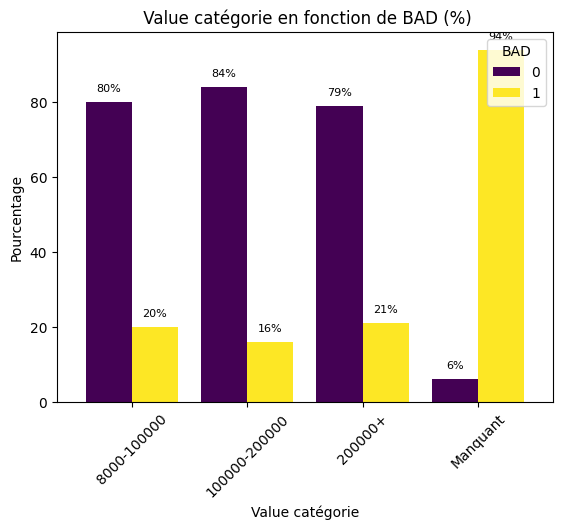

In [37]:
# Value en fonction de BAD
table_value = pd.crosstab(df['VALUE_Category'], df['BAD'], normalize='index') * 100
table_value = table_value.round(0) 

plt.figure(figsize=(12, 6))
ax = table_value.plot(kind='bar', stacked=False, colormap='viridis', width=0.8)
plt.title(' Value catégorie en fonction de BAD (%)')
plt.xlabel('Value catégorie')
plt.ylabel('Pourcentage')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points', fontsize=8)  

plt.legend(title='BAD', loc='upper right')
plt.show()


* LOAN (Montant de la demande de prêt)

In [38]:
df['Loan_Rounded'] = df['LOAN'].round()
table_loan = pd.crosstab(df['LOAN'], df['BAD'])
table_loan

BAD,0,1
LOAN,,
1100,0,1
1300,0,1
1500,0,2
1700,1,1
1800,0,2
...,...,...
88900,2,0
89000,1,0
89200,1,0


In [39]:
bins = [11000, 25000, 50000, float('inf')]  
labels = ['11000-25000', '25000-50000','50000+']  
df['LOAN_Category'] = pd.cut(df['LOAN'], bins=bins, labels=labels, right=False)
table_loan = pd.crosstab(df['LOAN_Category'], df['BAD'])
table_loan

BAD,0,1
LOAN_Category,,
11000-25000,2712,565
25000-50000,895,196
50000+,123,30


<Figure size 1200x600 with 0 Axes>

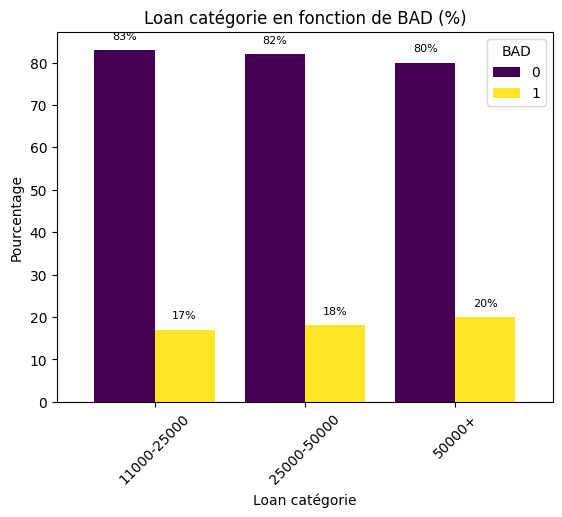

In [40]:
# LOAN en fonction de BAD
table_loan= pd.crosstab(df['LOAN_Category'], df['BAD'], normalize='index') * 100
table_loan = table_loan.round(0) 

plt.figure(figsize=(12, 6))
ax = table_loan.plot(kind='bar', stacked=False, colormap='viridis', width=0.8)
plt.title('Loan catégorie en fonction de BAD (%)')
plt.xlabel('Loan catégorie')
plt.ylabel('Pourcentage')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points', fontsize=8)  

plt.legend(title='BAD', loc='upper right')
plt.show()


* DEBTINC (Ratio dette sur revenu)

In [41]:
df['DEBTINC_Round'] = df['DEBTINC'].round()
table_debt = pd.crosstab(df['DEBTINC'], df['BAD'])
table_debt

BAD,0,1
DEBTINC,,
0.524499,0,1
0.720295,1,0
0.838118,0,1
1.028931,0,1
1.565931,1,0
...,...,...
114.050528,0,1
133.528270,0,1
143.949605,0,1


In [42]:
bins = [0, 25, 50, float('inf')]  
labels = ['0-25', '25-50', '50+']  
df['DEBTINC_Category'] = pd.cut(df['DEBTINC'], bins=bins, labels=labels, right=False) 
df['DEBTINC_Category'] = df['DEBTINC_Category'].cat.add_categories('Manquant') 
df['DEBTINC_Category'] = df['DEBTINC_Category'].fillna('Manquant') 
table_debt = pd.crosstab(df['DEBTINC_Category'], df['BAD'])
table_debt

BAD,0,1
DEBTINC_Category,,
0-25,564,42
25-50,3726,316
50+,0,45
Manquant,481,786


<Figure size 1200x600 with 0 Axes>

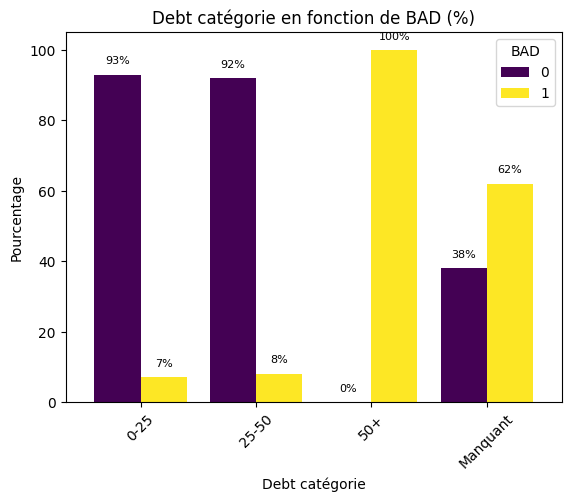

In [43]:
# DEBTINC en fonction de BAD
table_debt= pd.crosstab(df['DEBTINC_Category'], df['BAD'], normalize='index') * 100
table_debt = table_debt.round(0) 

plt.figure(figsize=(12, 6))
ax = table_debt.plot(kind='bar', stacked=False, colormap='viridis', width=0.8)
plt.title('Debt catégorie en fonction de BAD (%)')
plt.xlabel('Debt catégorie')
plt.ylabel('Pourcentage')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points', fontsize=8)  

plt.legend(title='BAD', loc='upper right')
plt.show()


* SKEWNESS ET KURTOSIS 

Skewness:
LOAN       2.023781
MORTDUE    1.814481
VALUE      3.053344
YOJ        0.988460
CLAGE      1.343412
DELINQ     4.023150
DEROG      5.320870
NINQ       2.621984
CLNO       0.775052
DEBTINC    2.852353
dtype: float64

Kurtosis:
LOAN        6.932590
MORTDUE     6.481866
VALUE      24.362805
YOJ         0.372072
CLAGE       7.599549
DELINQ     23.565449
DEROG      36.872763
NINQ        9.786507
CLNO        1.157673
DEBTINC    50.504042
dtype: float64


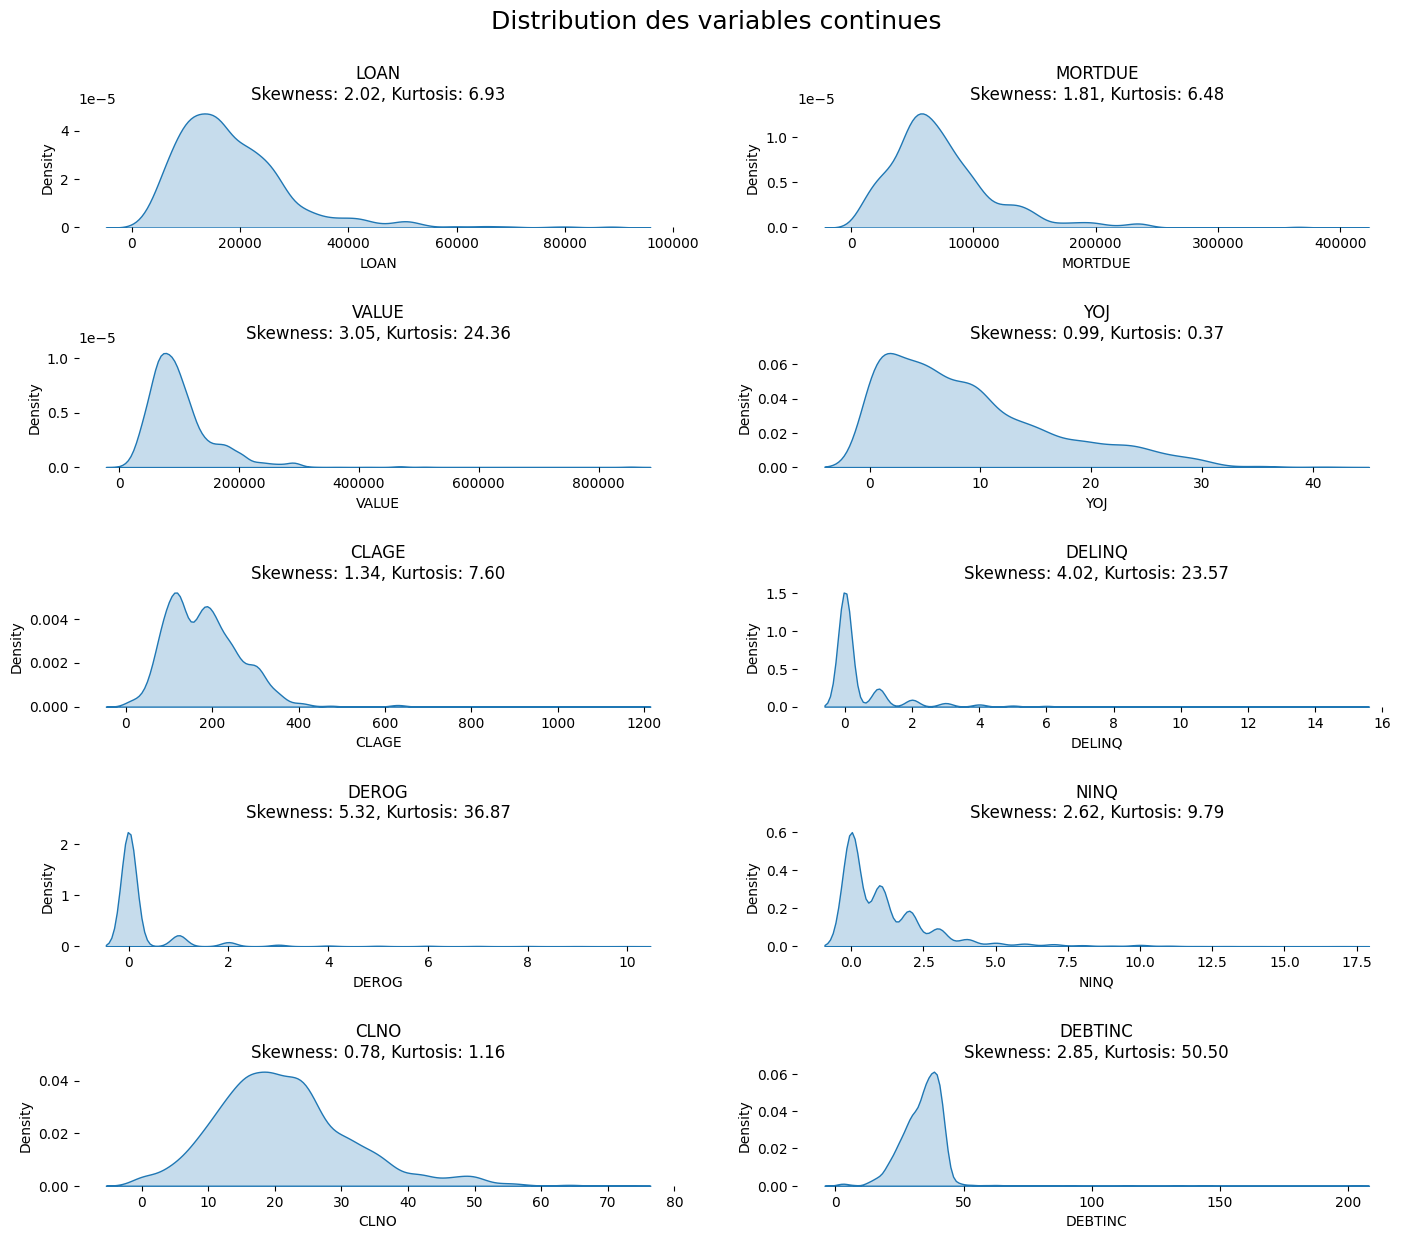

In [44]:
col_numericals = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'DELINQ', 'DEROG', 'NINQ', 'CLNO', 'DEBTINC']
df[col_numericals] = df[col_numericals].astype(float)

# Calcul la sk et la ku
skewness = df[col_numericals].skew()
kurtosis = df[col_numericals].kurt()

print("Skewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)

ncols = 2
nrows = len(col_numericals) // ncols + (len(col_numericals) % ncols > 0)

plt.figure(figsize=(17, 14))
plt.subplots_adjust(hspace=1)
plt.suptitle("Distribution des variables continues", fontsize=18, y=0.95)

# Créer les graphiques KDE avec sk et ku
for n, variable in enumerate(col_numericals):
    ax = plt.subplot(nrows, ncols, n + 1)
    sns.kdeplot(ax=ax, data=df[variable], legend=None, fill=True)  

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_title(f"{variable}\nSkewness: {skewness[variable]:.2f}, Kurtosis: {kurtosis[variable]:.2f}", loc='center', fontsize=12)

plt.show()


In [45]:
# Asymétrie élevée et kurtosis élevée pour : VALUE, DELINQ, et DEROG 

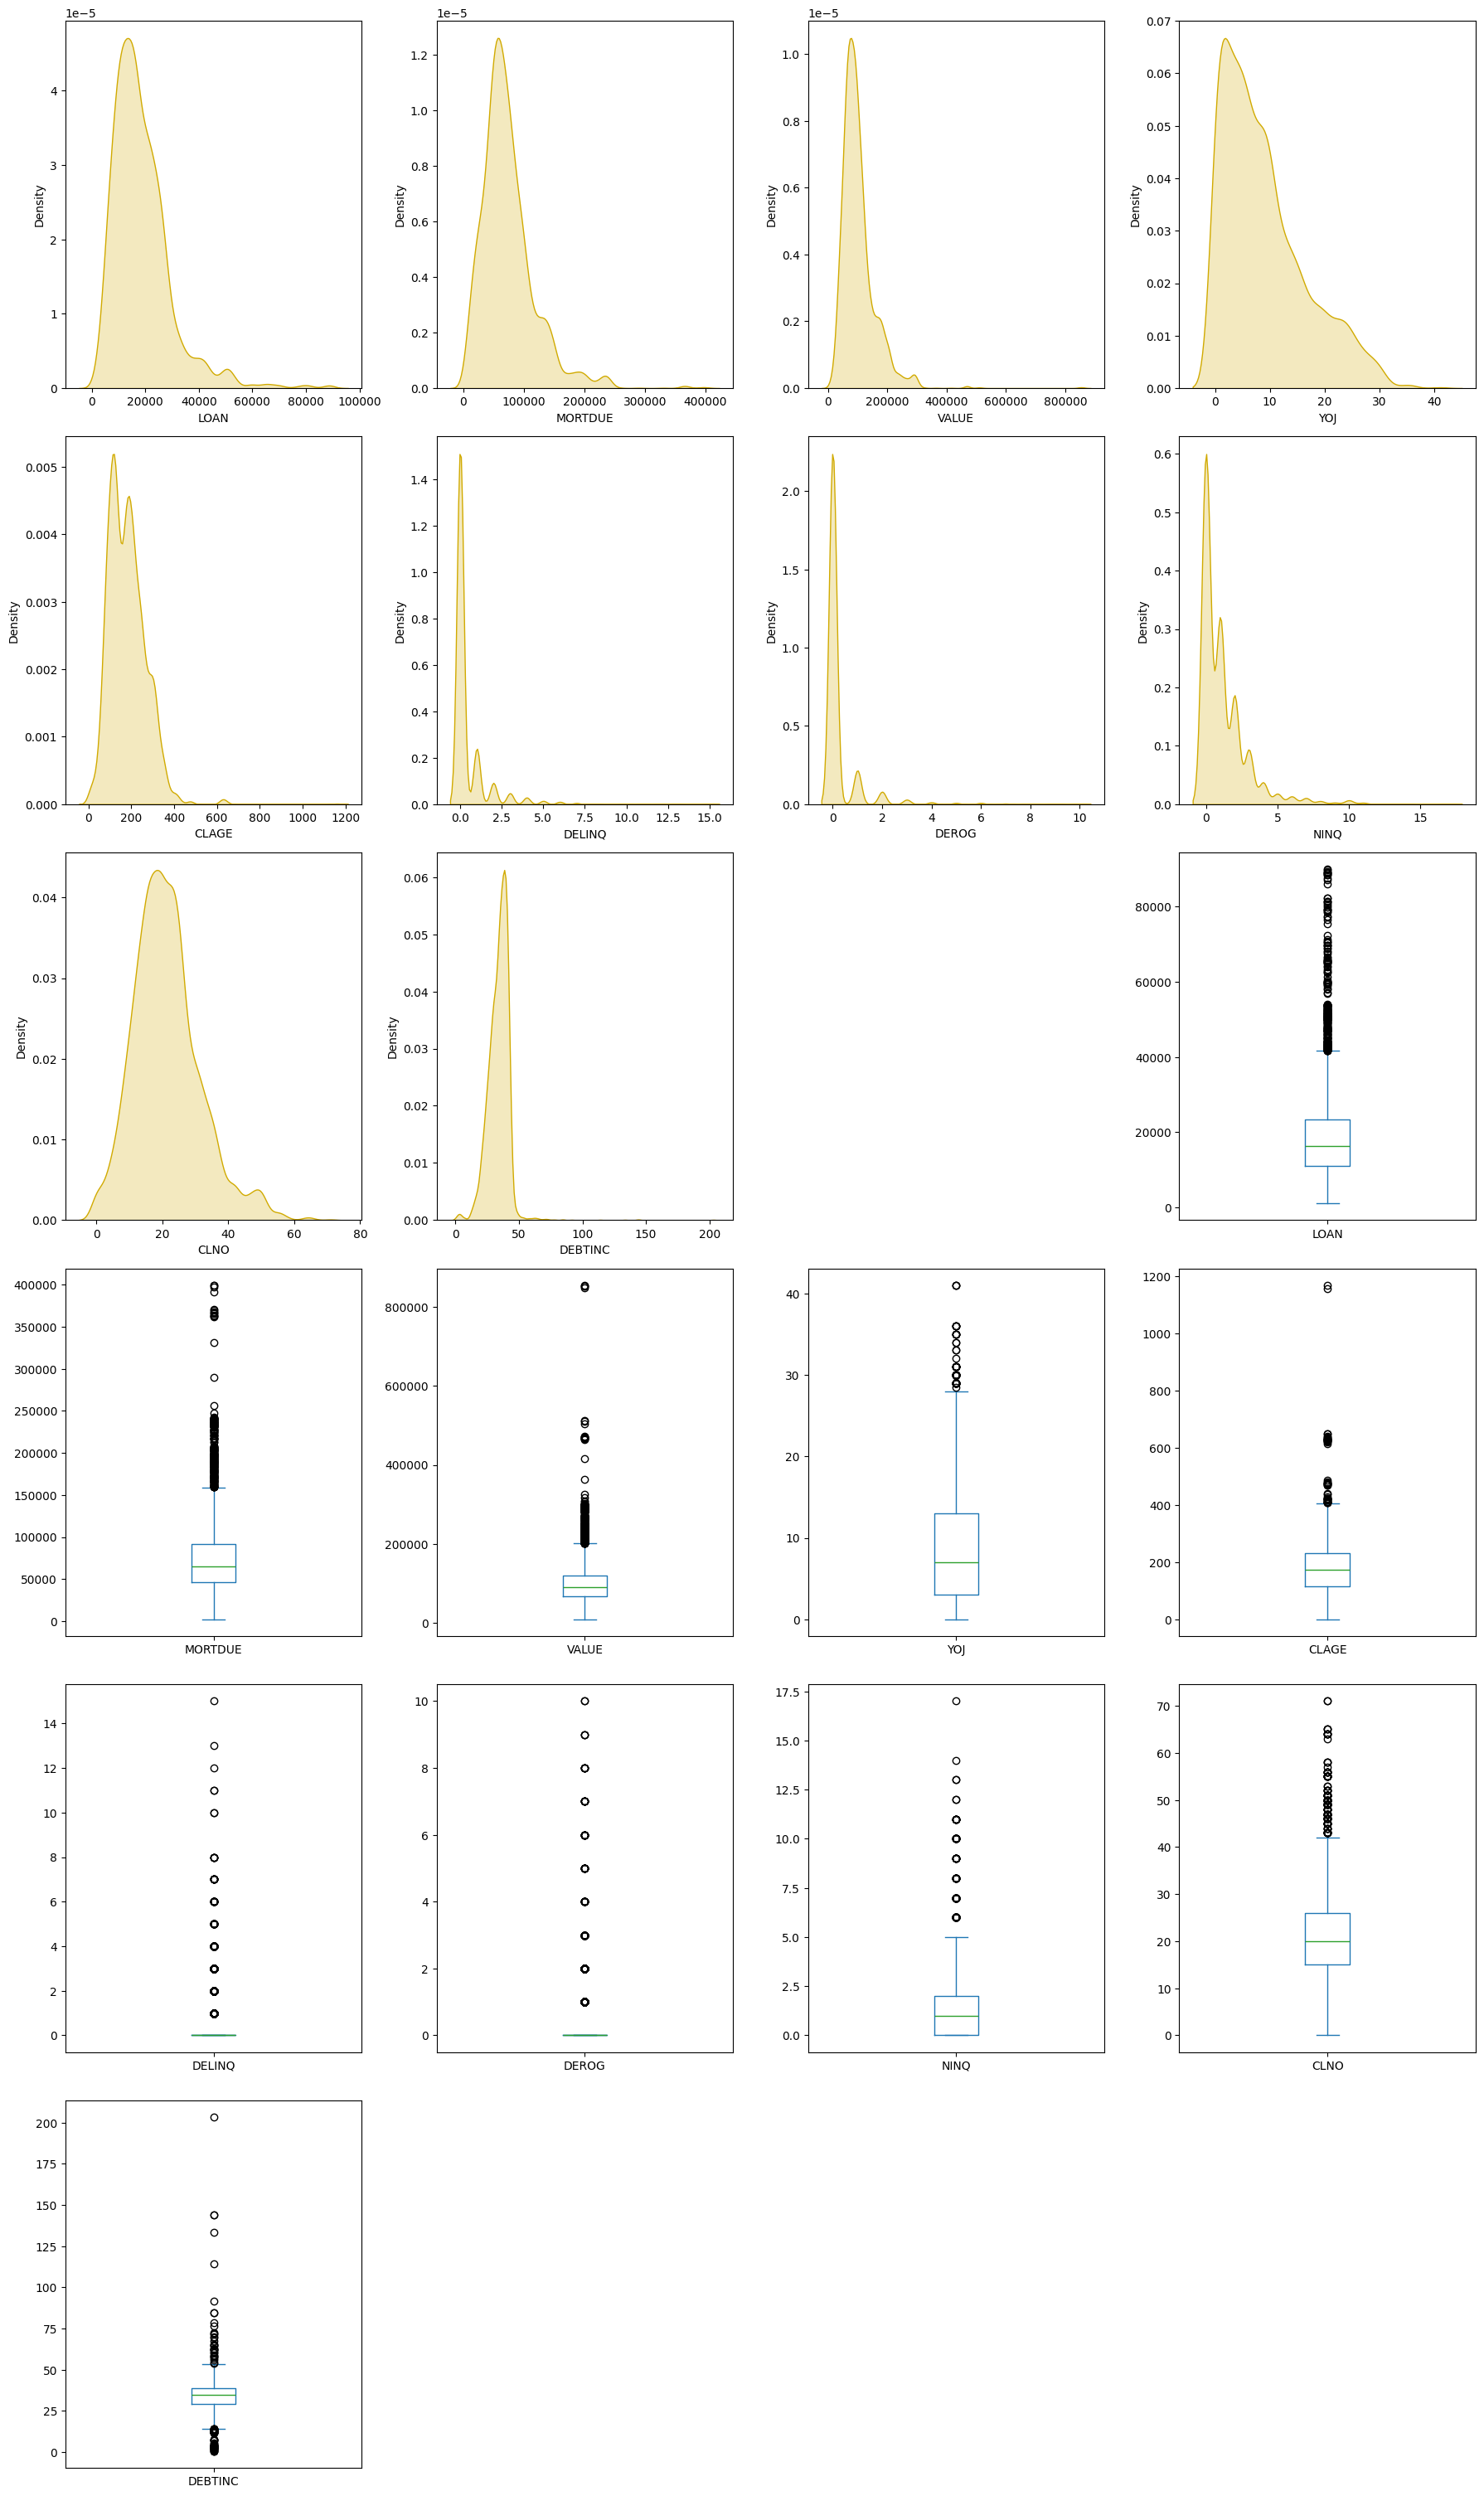

In [46]:
# Distribution et Box plot
plt.figure(figsize=(18,40))
for i,col in enumerate(col_numericals,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='#d1aa00',fill=True)
    plt.subplot(8,4,i+11)
    df[col].plot.box()
plt.tight_layout() 
plt.show()

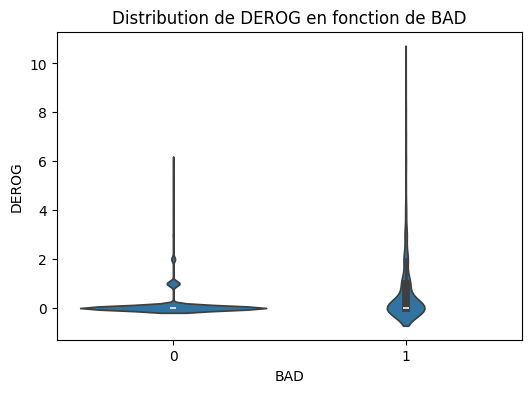

In [47]:
plt.figure(figsize=(6,4))
sns.violinplot(data=df, x='BAD', y='DEROG')
plt.title("Distribution de DEROG en fonction de BAD")
plt.show()

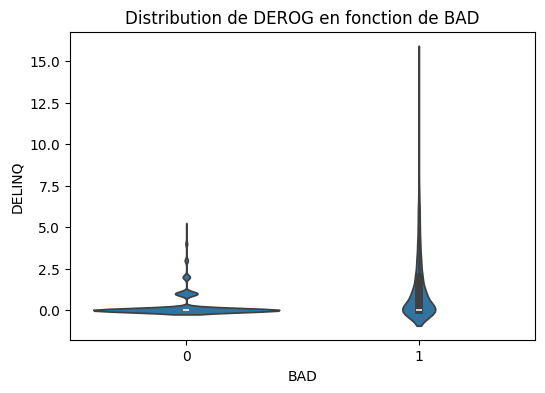

In [48]:
plt.figure(figsize=(6,4))
sns.violinplot(data=df, x='BAD', y='DELINQ')
plt.title("Distribution de DEROG en fonction de BAD")
plt.show()

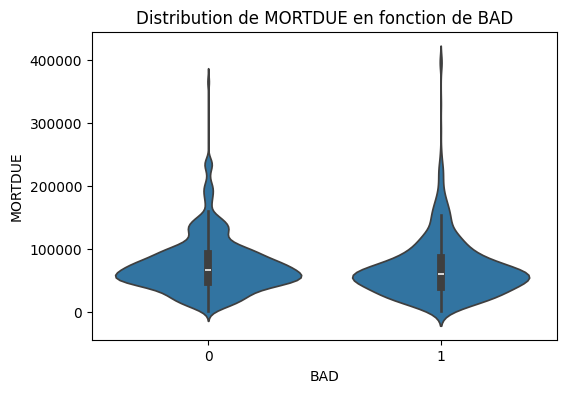

In [49]:
plt.figure(figsize=(6,4))
sns.violinplot(data=df, x='BAD', y='MORTDUE')
plt.title("Distribution de MORTDUE en fonction de BAD")
plt.show()

###  Analyse de corrélations entre les variables explicatives

In [50]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.drop("BAD")
target = 'BAD'

print(f"Variables catégorielles : {categorical_cols}")
print(f"Variables numériques : {numerical_cols}")

Variables catégorielles : Index(['REASON', 'JOB'], dtype='object')
Variables numériques : Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC'],
      dtype='object')


##### Numériques vs numériques

Variables quantitatives vs. Variables quantitatives:


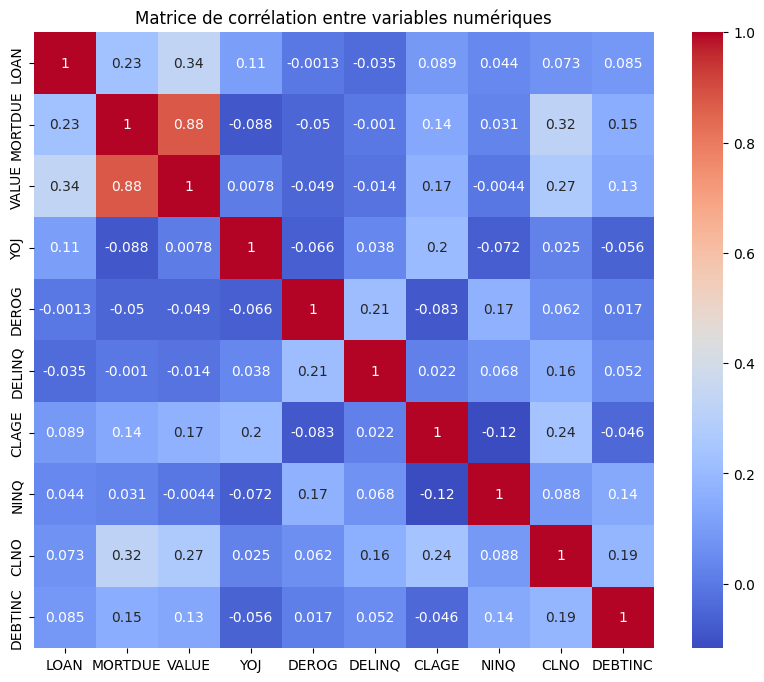

In [51]:
print("Variables quantitatives vs. Variables quantitatives:")
plt.figure(figsize=(10, 8)) 
corr_matrix = data[numerical_cols].corr(method='pearson')  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation entre variables numériques")
plt.show()

### Analyse de corrélation avec la variable cible

In [52]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [53]:
correlation_results = []

print("\nTest des variables numériques et catégorielles avec la variable cible:")

# Analyse des variables numériques avec Spearman
for col in numerical_cols:
    if col != target:
        non_null_data = data[[col, target]].dropna()
        corr, p_value = pearsonr(non_null_data[col], non_null_data[target])
        correlation_results.append((col, 'Spearman', corr, p_value))

# Analyse des variables catégorielles avec chi²
for col in categorical_cols:
    if col != target:
        contingency_table = pd.crosstab(data[col], data[target])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        correlation_results.append((col, 'Chi²', chi2, p_value))

# Trier par la force de la corrélation (Spearman)
correlation_results.sort(key=lambda x: abs(x[2]), reverse=True)

# Affichage des résultats
for col, test_type, stat, p_value in correlation_results:
    if test_type == 'Spearman':
        print(f"Variable {col} - Test: {test_type} - Corrélation : {stat:.3f} (p-value: {p_value:.3f})")
    else:
        print(f"Variable {col} - Test: {test_type} - Statistique Chi² : {stat:.3f} (p-value: {p_value:.3f})")



Test des variables numériques et catégorielles avec la variable cible:
Variable JOB - Test: Chi² - Statistique Chi² : 81.932 (p-value: 0.000)
Variable REASON - Test: Chi² - Statistique Chi² : 8.040 (p-value: 0.005)
Variable DELINQ - Test: Spearman - Corrélation : 0.354 (p-value: 0.000)
Variable DEROG - Test: Spearman - Corrélation : 0.276 (p-value: 0.000)
Variable DEBTINC - Test: Spearman - Corrélation : 0.200 (p-value: 0.000)
Variable NINQ - Test: Spearman - Corrélation : 0.175 (p-value: 0.000)
Variable CLAGE - Test: Spearman - Corrélation : -0.170 (p-value: 0.000)
Variable LOAN - Test: Spearman - Corrélation : -0.075 (p-value: 0.000)
Variable YOJ - Test: Spearman - Corrélation : -0.060 (p-value: 0.000)
Variable MORTDUE - Test: Spearman - Corrélation : -0.048 (p-value: 0.000)
Variable VALUE - Test: Spearman - Corrélation : -0.030 (p-value: 0.022)
Variable CLNO - Test: Spearman - Corrélation : -0.004 (p-value: 0.753)


In [54]:
correlation_df = pd.DataFrame(
    [(col, abs(corr), p_value) for col, test_type, corr, p_value in correlation_results if test_type == 'Spearman'],
    columns=['Variable', 'Correlation', 'P-Value']
)

/var/folders/69/j599p47x1wb0mvnxf05tpj5m0000gn/T/ipykernel_43437/93966448.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=correlation_df, x='Correlation', y='Variable', palette='coolwarm', ci=None)
/var/folders/69/j599p47x1wb0mvnxf05tpj5m0000gn/T/ipykernel_43437/93966448.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation_df, x='Correlation', y='Variable', palette='coolwarm', ci=None)


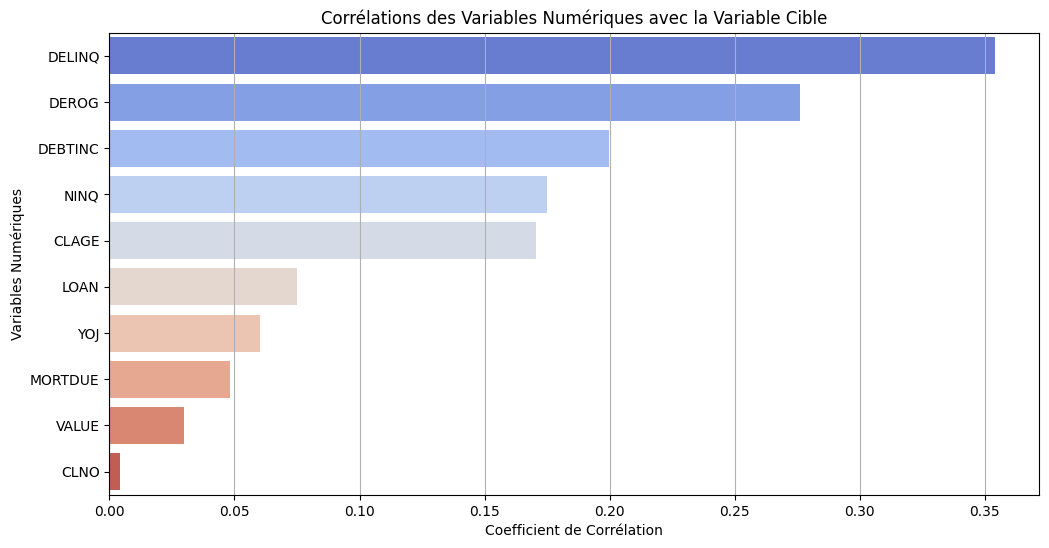

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(data=correlation_df, x='Correlation', y='Variable', palette='coolwarm', ci=None)
plt.title('Corrélations des Variables Numériques avec la Variable Cible')
plt.xlabel('Coefficient de Corrélation')
plt.ylabel('Variables Numériques')
plt.axvline(0, color='grey', linestyle='--')  
plt.grid(axis='x')
plt.show()

### Analyse des valeurs aberrantes 

* Méthode de l'IQR

In [56]:
outliers = pd.DataFrame()

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [57]:
# liste des colonnes numériques 
numerical_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 
                     'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

In [58]:
for column in numerical_columns:
    outliers_in_column = detect_outliers_iqr(data, column)
    if not outliers_in_column.empty:
        outliers = pd.concat([outliers, outliers_in_column])

print(f"Nombre total d'outliers détectés : {len(outliers)}")
print(outliers)

Nombre total d'outliers détectés : 3364
      BAD   LOAN   MORTDUE     VALUE   REASON      JOB   YOJ  DEROG  DELINQ  \
5704    0  41700   59889.0  109250.0  DebtCon      Mgr  16.0    0.0     0.0   
5705    0  41700   12375.0   71029.0  HomeImp   Office   NaN    0.0     0.0   
5706    1  41700       NaN  854112.0  HomeImp    Other  16.0    0.0     0.0   
5707    1  41700       NaN  854114.0  HomeImp    Other  18.0    0.0     0.0   
5708    1  41800  147416.0  227168.0  DebtCon     Self   2.0    0.0     4.0   
...   ...    ...       ...       ...      ...      ...   ...    ...     ...   
5731    1  42800    9133.0   44083.0  HomeImp  ProfExe   5.0    0.0     0.0   
5732    0  42800    6929.0   67573.0  HomeImp   Office   NaN    0.0     0.0   
5734    0  42900    8117.0   66731.0  HomeImp   Office   NaN    0.0     0.0   
5826    1  50100  256431.0       NaN      NaN    Other   0.0    0.0     4.0   
5912    1  65500  205156.0  290239.0  DebtCon  ProfExe   2.0    0.0     0.0   

           

* Boxplots des outliers 

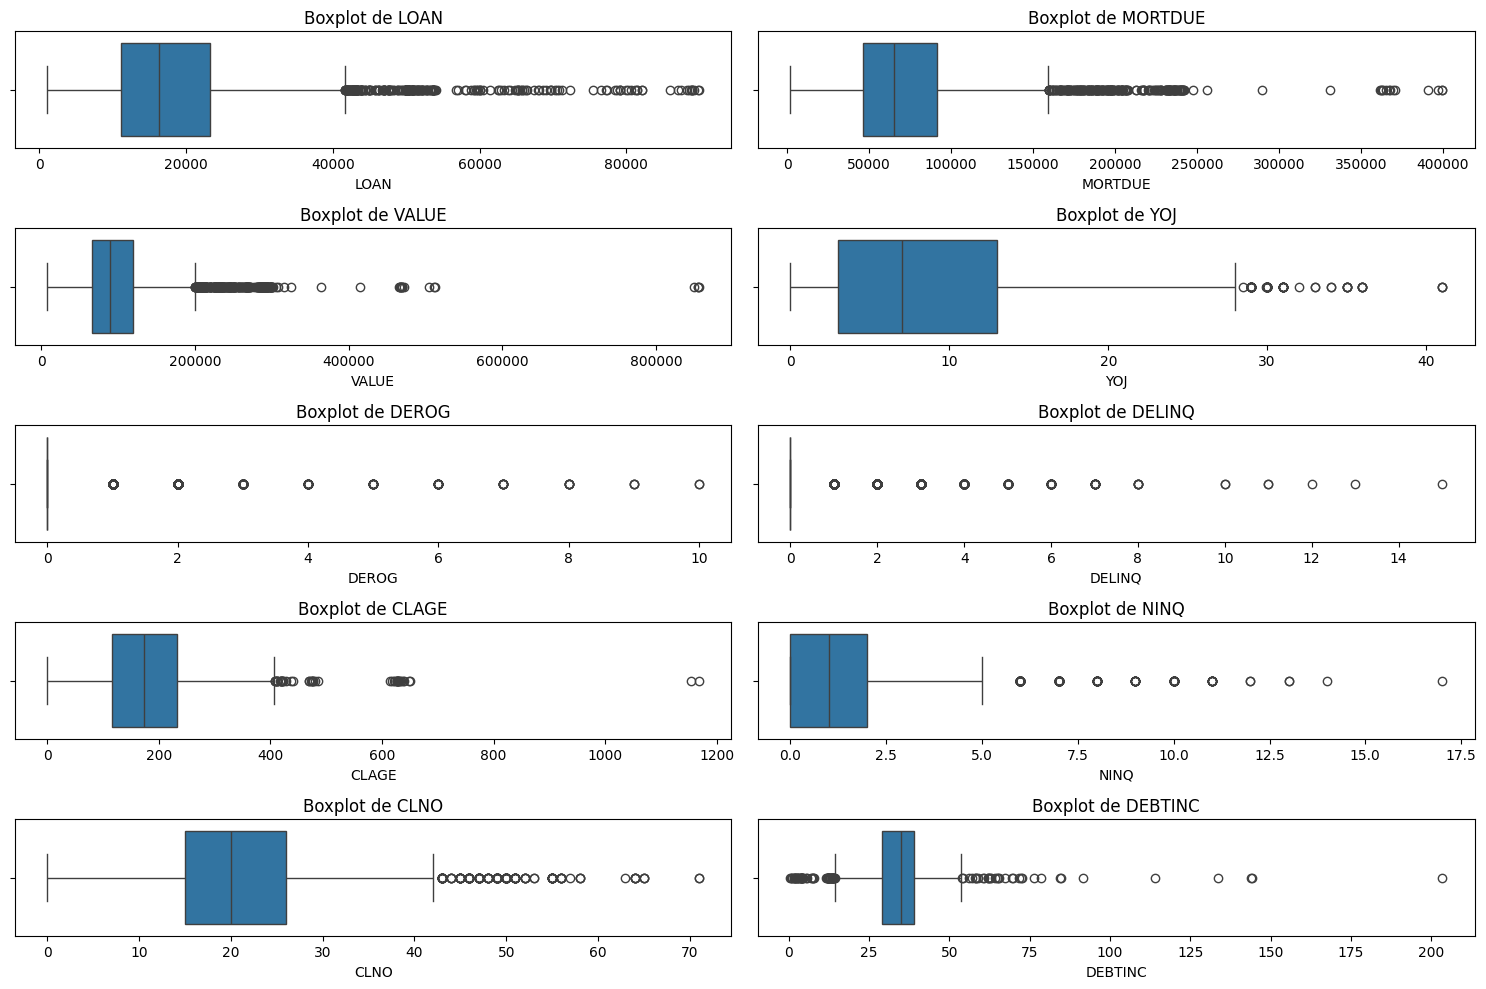

In [59]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns):
    plt.subplot(5, 2, i+1) 
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

In [60]:
# nombre de outliers par variable 

for var in numerical_columns:
    Q1 = data[var].quantile(0.25)
    Q3 = data[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[var] < lower_bound) | (data[var] > upper_bound)]
    print(f'Valeurs aberrantes pour {var}:')
    print(outliers)

Valeurs aberrantes pour LOAN:
      BAD   LOAN   MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
5704    0  41700   59889.0  109250.0  DebtCon     Mgr  16.0    0.0     0.0   
5705    0  41700   12375.0   71029.0  HomeImp  Office   NaN    0.0     0.0   
5706    1  41700       NaN  854112.0  HomeImp   Other  16.0    0.0     0.0   
5707    1  41700       NaN  854114.0  HomeImp   Other  18.0    0.0     0.0   
5708    1  41800  147416.0  227168.0  DebtCon    Self   2.0    0.0     4.0   
...   ...    ...       ...       ...      ...     ...   ...    ...     ...   
5955    0  88900   57264.0   90185.0  DebtCon   Other  16.0    0.0     0.0   
5956    0  89000   54576.0   92937.0  DebtCon   Other  16.0    0.0     0.0   
5957    0  89200   54045.0   92924.0  DebtCon   Other  15.0    0.0     0.0   
5958    0  89800   50370.0   91861.0  DebtCon   Other  14.0    0.0     0.0   
5959    0  89900   48811.0   88934.0  DebtCon   Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    D

### Distance de cook

Optimization terminated successfully.
         Current function value: 0.391693
         Iterations 7


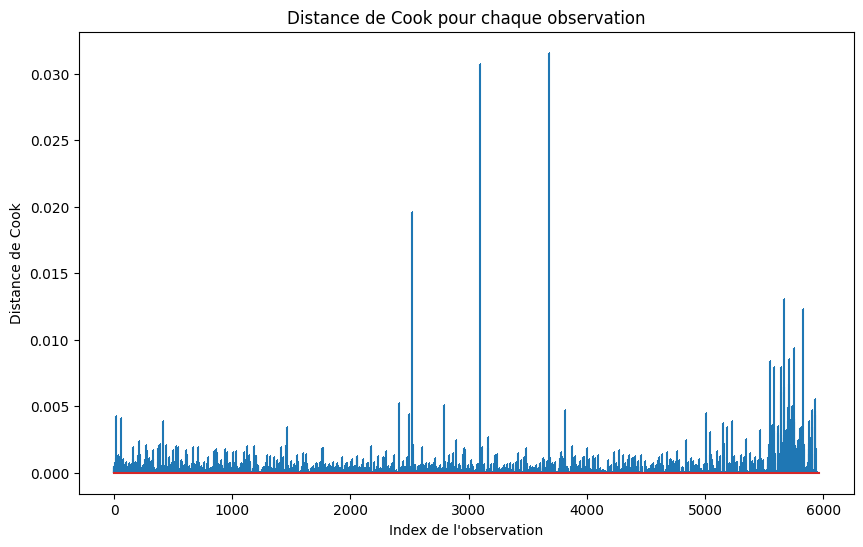

In [64]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns 
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median()) 
categorical_columns = data.select_dtypes(include=['object']).columns
target_variable = 'BAD'
feature_variables = numeric_columns.drop(target_variable) 

X_numeric_features = data[feature_variables]
y_target = data[target_variable]  

X_numeric_with_constant = sm.add_constant(X_numeric_features)
logistic_model = sm.Logit(y_target, X_numeric_with_constant)
logistic_model_fit = logistic_model.fit()

influence = logistic_model_fit.get_influence()
cooks_distances = influence.cooks_distance[0]

predicted_values = logistic_model_fit.predict(X_numeric_with_constant)
residuals = y_target - predicted_values

# Calcul des résidus standardisés
standardized_residuals = residuals / np.std(residuals)

plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_distances)), cooks_distances, markerfmt=",")
plt.title("Distance de Cook pour chaque observation")
plt.xlabel("Index de l'observation")
plt.ylabel("Distance de Cook")
plt.show()


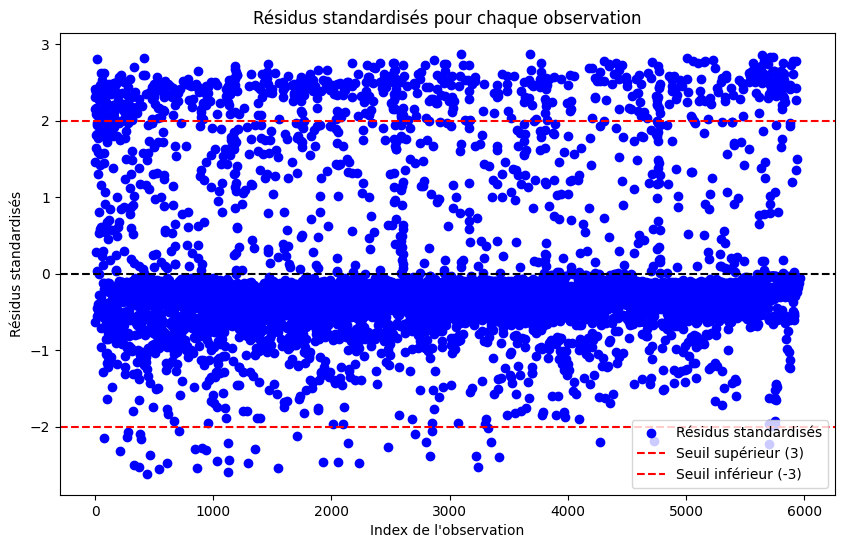

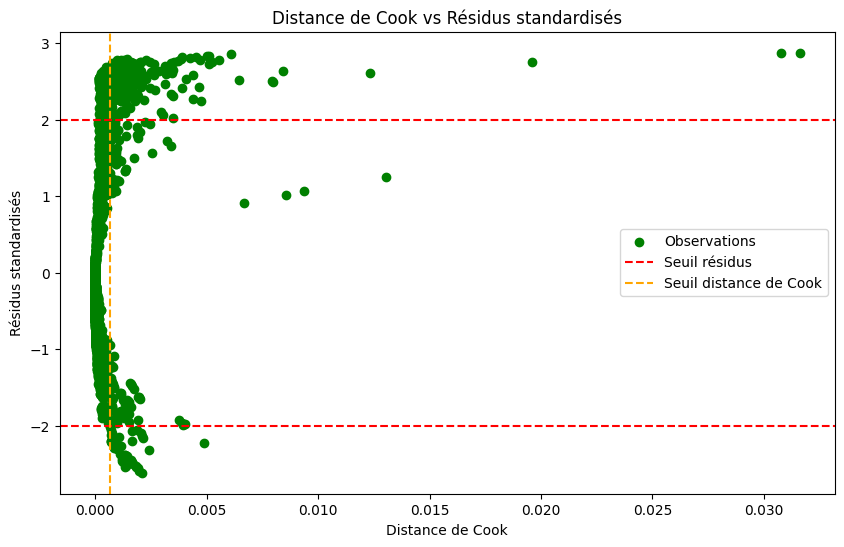

In [65]:

# Graphique des résidus standardisés
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(standardized_residuals)), standardized_residuals, c="blue", label="Résidus standardisés")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=2, color='red', linestyle='--', label='Seuil supérieur (3)')
plt.axhline(y=-2, color='red', linestyle='--', label='Seuil inférieur (-3)')
plt.title("Résidus standardisés pour chaque observation")
plt.xlabel("Index de l'observation")
plt.ylabel("Résidus standardisés")
plt.legend()
plt.show()

# Graphique influence (Distance de Cook vs Résidus standardisés)
plt.figure(figsize=(10, 6))
plt.scatter(cooks_distances, standardized_residuals, c='green', label="Observations")
plt.axhline(y=2, color='red', linestyle='--', label="Seuil résidus")
plt.axhline(y=-2, color='red', linestyle='--')
plt.axvline(x=4 / (len(data) - len(feature_variables)), color='orange', linestyle='--', label="Seuil distance de Cook")
plt.title("Distance de Cook vs Résidus standardisés")
plt.xlabel("Distance de Cook")
plt.ylabel("Résidus standardisés")
plt.legend()    
plt.show()

 Dans notre analyse, nous avons choisi d'utiliser la distance de Cook pour identifier les points influents, plutôt qu'un seuil fixe pour les résidus studentisés. La distance de Cook offre une mesure plus robuste de l'influence d'une observation sur les paramètres du modèle en tenant compte à la fois de la distance et de l'impact de l'observation sur l'ajustement global. En calculant la distance de Cook pour chaque observation, nous avons pu établir un seuil adaptable en fonction de la taille de notre échantillon. Cette approche nous permet de mieux identifier les observations ayant un effet disproportionné sur notre modèle, en complément des résidus standardisés qui, bien qu'utiles, ne capturent pas nécessairement l'influence d'une observation sur les coefficients du modèle.


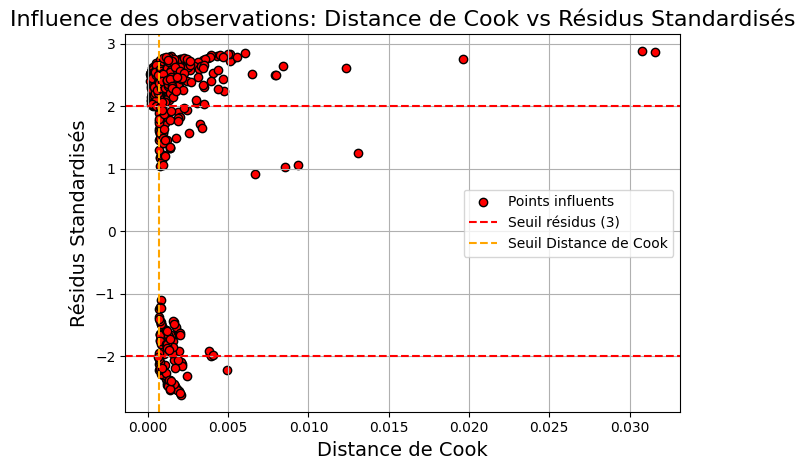

In [66]:
# Mise en surbrillance des points influents
threshold_cook = 4 / (len(data) - len(feature_variables))
threshold_resid = 2
influential_points = (cooks_distances > threshold_cook) | (np.abs(standardized_residuals) > threshold_resid)

plt.scatter(cooks_distances[influential_points], standardized_residuals[influential_points], color='red', label='Points influents', edgecolor='black')

# Lignes de seuil
plt.axhline(y=threshold_resid, color='red', linestyle='--', label="Seuil résidus (3)")
plt.axhline(y=-threshold_resid, color='red', linestyle='--')
plt.axvline(x=threshold_cook, color='orange', linestyle='--', label="Seuil Distance de Cook")

plt.title("Influence des observations: Distance de Cook vs Résidus Standardisés", fontsize=16)
plt.xlabel("Distance de Cook", fontsize=14)
plt.ylabel("Résidus Standardisés", fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [67]:

number_of_observations = len(data)
number_of_parameters = X_numeric_with_constant.shape[1] 
cooks_distance_threshold = 4 / (number_of_observations - number_of_parameters)

outliers = np.where(cooks_distances > cooks_distance_threshold)[0]

# Affichage des indices des outliers (si aucun outlier, on ne fait rien)
if len(outliers) > 0:
    print(f"Indices des outliers détectés : {outliers}")

    # Réintégration des variables catégorielles
    # On conserve les variables catégorielles dans la version complète du dataset
    data_with_categories = data.copy()

    # Suppression des outliers détectés dans l'ensemble des données
    data_cleaned = data_with_categories.drop(index=outliers)
    target_variable = 'BAD'
    feature_variables = numeric_columns.drop(target_variable) 
    X_numeric_features = data[feature_variables]

    # Réajustement du modèle sans les outliers
    X_features_cleaned = data_cleaned[feature_variables] # Toutes les variables explicatives
    y_target_cleaned = data_cleaned[target_variable]

    # Ajout d'une constante dans les features nettoyées
    X_features_cleaned_with_constant = sm.add_constant(X_features_cleaned)

    # Application du modèle sur les données sans outliers
    logistic_model_cleaned = sm.Logit(y_target_cleaned, X_features_cleaned_with_constant)
    logistic_model_fit_cleaned = logistic_model_cleaned.fit()

    # Affichage du résumé du modèle ajusté sans les outliers
    print(logistic_model_fit_cleaned.summary())

else:
    print("Aucun outlier détecté. Pas de suppression d'observations.")

Indices des outliers détectés : [  10   15   17   37   42   45   46   54   57   58   75   77   99  101
  123  161  163  179  183  204  212  219  263  273  282  283  297  315
  330  332  372  373  377  393  411  437  442  461  465  492  499  512
  524  527  532  541  545  564  578  606  610  616  659  666  679  701
  707  723  758  788  798  845  849  865  867  875  896  903  939  940
  942  943  954  957  976  980 1007 1018 1031 1072 1098 1102 1107 1110
 1123 1125 1127 1130 1142 1145 1147 1148 1187 1188 1194 1197 1202 1284
 1297 1320 1349 1357 1379 1380 1392 1404 1410 1415 1429 1452 1463 1493
 1548 1552 1597 1607 1628 1710 1740 1760 1765 1856 1882 1927 1930 1962
 1967 2004 2013 2052 2055 2058 2110 2144 2150 2172 2177 2203 2229 2273
 2289 2290 2302 2354 2371 2413 2448 2476 2491 2522 2530 2533 2607 2609
 2635 2660 2695 2703 2708 2718 2794 2799 2801 2828 2832 2847 2849 2864
 2894 2951 2954 2961 2965 3021 3087 3097 3115 3132 3160 3167 3192 3211
 3220 3243 3349 3400 3420 3444 3471 3482 3604

##### TEST DE WHITE

In [68]:
predicted_values = logistic_model_fit.predict()
y = logistic_model_fit.model.endog
residuals = y - predicted_values
white_test = het_white(residuals, logistic_model_fit.model.exog)

labels = ['Statistique de Test', 'p-valeur de la Statistique de Test', 'Statistique F', 'p-valeur du Test F']

print(dict(zip(labels, white_test)))

{'Statistique de Test': 779.8854807152428, 'p-valeur de la Statistique de Test': 4.336315853321792e-123, 'Statistique F': 13.651747558930325, 'p-valeur du Test F': 2.586489775067731e-133}


Les résultats de votre test de White pour l'hétéroscédasticité sont les suivants :

Statistique de Test : 779.89
p-valeur de la Statistique de Test : 
4.34×10 −123
 
Statistique F : 13.65
p-valeur du Test F : 2.59×10 −133
 
Interprétation
H0 (Hypothèse nulle) : L'hypothèse nulle du test de White stipule qu'il n'y a pas d'hétéroscédasticité dans les résidus du modèle. Cela signifie que la variance des erreurs est constante à travers toutes les valeurs de la variable indépendante.

p-valeurs très faibles : Les p-valeurs pour la statistique de test sont bien inférieures à 0.05 ou 0.01.

Conclusion
Étant donné que les p-valeurs sont très inférieures aux seuils de signification habituels (0.05 ou 0.01), vous pouvez rejeter l'hypothèse nulle. Cela signifie qu'il y a des preuves statistiques solides pour conclure qu'il y a de l'hétéroscédasticité dans les résidus de notre modèle de régression logistique.

In [69]:
class SupprimerOutlierAvecCookDistance:
    def __init__(self, donnees: pd.DataFrame, variable_cible: str) -> None:
        self.donnees = donnees
        self.variable_cible = variable_cible
        self.nombre_observations = len(donnees)
        self.nombre_parametres = donnees.shape[1]
        self.colonnes_numeriques = donnees.select_dtypes(include=['float64', 'int64']).columns
        self.colonnes_categoriques = donnees.select_dtypes(include=['object']).columns
        self.donnees_nettoyees = None
        self.nombre_outliers = 0

    def ajuster_modele_logistique(self) -> BinaryResultsWrapper:
        variables_predictives = self.colonnes_numeriques.drop(self.variable_cible)
        X = self.donnees[variables_predictives]
        y = self.donnees[self.variable_cible]

        X_avec_constante = sm.add_constant(X)
        modele_logistique = sm.Logit(y, X_avec_constante)
        return modele_logistique.fit()

    def identifier_outliers(self) -> None:
        ajustement_modele = self.ajuster_modele_logistique()
        influence = ajustement_modele.get_influence()
        distance_cook = influence.cooks_distance[0]

        seuil_cook = 4 / (self.nombre_observations - self.nombre_parametres)
        outliers = np.where(distance_cook > seuil_cook)[0]

        self.donnees_nettoyees = self.donnees.drop(index=outliers)
        self.nombre_outliers = len(outliers)

    def obtenir_donnees_nettoyees(self) -> tuple[pd.DataFrame, int]:
        self.identifier_outliers()
        return self.donnees_nettoyees, self.nombre_outliers


In [70]:
analyseur = SupprimerOutlierAvecCookDistance(data, 'BAD')
donnees_nettoyees, nombre_outliers = analyseur.obtenir_donnees_nettoyees()

print("Nombre d'outliers détectés :", nombre_outliers)
print("Données après nettoyage :")
print(donnees_nettoyees)

Optimization terminated successfully.
         Current function value: 0.391693
         Iterations 7
Nombre d'outliers détectés : 407
Données après nettoyage :
      BAD   LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0       1   1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1       1   1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2       1   1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3       1   1500  65019.0   89235.5      NaN     NaN   7.0    0.0     0.0   
4       0   1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
...   ...    ...      ...       ...      ...     ...   ...    ...     ...   
5955    0  88900  57264.0   90185.0  DebtCon   Other  16.0    0.0     0.0   
5956    0  89000  54576.0   92937.0  DebtCon   Other  16.0    0.0     0.0   
5957    0  89200  54045.0   92924.0  DebtCon   Other  15.0    0.0     0.0   
5958    0  89800  50370.0   91861.0  DebtCon   Other  14.0    0.0    